In [1]:
from ocr.pytesseract_image_to_text import extract_text_from_image
from loguru import logger
import os

In [ ]:
import whisper

# Try to load the Whisper model
try:
    model = whisper.load_model("base")
    print("Model loaded successfully.")
except AttributeError as e:
    print(f"Error: {e}")


# Load the CLIP Model

In [2]:
from src.clip.clip_model import CLIPEmbeddingsModel

# instance
clip_model = CLIPEmbeddingsModel()

<Figure size 800x2000 with 0 Axes>

# Load and Process Image Dataset

In [3]:
base_dir = os.path.dirname(os.path.abspath("../"))

# Made sure to only take keyframes with short text content
relative_image_path_1 = os.path.join(base_dir, 'data', 'raw', 'biology_chapter_3_3', 'extracted_keyframes',
                                     'biology_chapter_3_3-Scene-039-01.jpg')
relative_image_path_2 = os.path.join(base_dir, 'data', 'raw', 'biology_chapter_3_3', 'extracted_keyframes',
                                     'biology_chapter_3_3-Scene-097-01.jpg')
relative_image_path_3 = os.path.join(base_dir, 'data', 'raw', 'biology_chapter_3_3', 'extracted_keyframes',
                                     'biology_chapter_3_3-Scene-014-01.jpg')

image_paths = [relative_image_path_1, relative_image_path_2, relative_image_path_3]

image_dataset = clip_model.load_and_process_dataset(image_paths)

logger.info(f"Image_dataset: {image_dataset}")

2024-06-14 09:35:17.785 | INFO     | __main__:<module>:15 - Image_dataset: [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=966x720 at 0x27BAB2F1A50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=966x720 at 0x27BAB2F21A0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=966x720 at 0x27BAB2F3FA0>]


# Generate OCR Captions

In [4]:
ocr_extracted_text = []
for path in image_paths:
    extract_text_from_image(path)
    ocr_extracted_text.append(extract_text_from_image(path))
    logger.info(f"OCR_results: {ocr_extracted_text}")

2024-06-14 09:35:18.265 | INFO     | ocr.pytesseract_image_to_text:extract_text_from_image:13 - Extracted text: Nutrients: Macronutrients

¢ Fats: source of stored energy
— Cushion and protect vital organs
— Insulate the body in cold weather

2024-06-14 09:35:18.579 | INFO     | ocr.pytesseract_image_to_text:extract_text_from_image:13 - Extracted text: Nutrients: Macronutrients

¢ Fats: source of stored energy
— Cushion and protect vital organs
— Insulate the body in cold weather

2024-06-14 09:35:18.579 | INFO     | __main__:<module>:5 - OCR_results: ['Nutrients: Macronutrients\n\n¢ Fats: source of stored energy\n— Cushion and protect vital organs\n— Insulate the body in cold weather\n']
2024-06-14 09:35:19.009 | INFO     | ocr.pytesseract_image_to_text:extract_text_from_image:13 - Extracted text: Which process uses transport proteins to move
hydrophilic molecules through the plasma membrane?
A. exocytosis

B. facilitated diffusion

C. osmosis

COME ON, STARCH...

D. passive diffusion

# Generate embeddings

In [5]:
outputs = clip_model.generate_dataset_embeddings(ocr_extracted_text)

2024-06-14 09:35:21.138 | INFO     | src.clip.clip_model:process_clip_tensors:81 - Image embeddings shape: torch.Size([3, 512])
2024-06-14 09:35:21.138 | INFO     | src.clip.clip_model:process_clip_tensors:82 - Text embeddings shape: torch.Size([3, 512])
2024-06-14 09:35:21.170 | INFO     | src.clip.clip_model:generate_dataset_embeddings:74 - Embeddings: {'image_embeds': tensor([[-0.0313,  0.0119, -0.0060,  ...,  0.0907, -0.0004,  0.0294],
        [-0.0215, -0.0346, -0.0177,  ...,  0.0294, -0.0139,  0.0238],
        [-0.0324,  0.0235, -0.0155,  ...,  0.0591, -0.0190,  0.0674]],
       grad_fn=<DivBackward0>), 'text_embeds': tensor([[ 0.0037,  0.0297,  0.0039,  ..., -0.0414, -0.0201, -0.0041],
        [ 0.0090,  0.0198, -0.0108,  ..., -0.1269, -0.0050,  0.0135],
        [ 0.0024,  0.0327, -0.0352,  ..., -0.0264,  0.0146,  0.0027]],
       grad_fn=<DivBackward0>)}


# Generate Dataset Metadata

In [6]:
clip_model.generate_dataset_metadata(image_paths)

2024-06-14 09:35:21.186 | INFO     | image_utils:generate_image_metadata:31 - Created metadata for 3 images
2024-06-14 09:35:21.186 | INFO     | image_utils:generate_image_metadata:32 - Metadata: [{'filename': 'biology_chapter_3_3-Scene-039-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-039-01.jpg'}, {'filename': 'biology_chapter_3_3-Scene-097-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-097-01.jpg'}, {'filename': 'biology_chapter_3_3-Scene-014-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-014-01.jpg'}]
2024-06-14 09:35:21.186 | INFO     | src.clip.clip_model:generate_dataset_metadata:38 - Metadata: [{'filename': 'biology_chapter_3_3-Scene-039-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\af

[{'filename': 'biology_chapter_3_3-Scene-039-01.jpg',
  'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-039-01.jpg'},
 {'filename': 'biology_chapter_3_3-Scene-097-01.jpg',
  'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-097-01.jpg'},
 {'filename': 'biology_chapter_3_3-Scene-014-01.jpg',
  'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-014-01.jpg'}]

# Store Dataset Locally

In [7]:
clip_model.store_dataset_locally(clip_model.metadata, clip_model.embeddings)

2024-06-14 09:35:21.201 | INFO     | src.clip.clip_model:store_dataset_locally:43 - Storing metadata and embeddings in database
2024-06-14 09:35:21.201 | INFO     | src.clip.clip_model:store_dataset_locally:45 - Metadata: [{'filename': 'biology_chapter_3_3-Scene-039-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-039-01.jpg'}, {'filename': 'biology_chapter_3_3-Scene-097-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-097-01.jpg'}, {'filename': 'biology_chapter_3_3-Scene-014-01.jpg', 'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-014-01.jpg'}]
2024-06-14 09:35:21.201 | INFO     | src.clip.clip_model:store_dataset_locally:46 - Embeddings: {'image_embeds': tensor([[-0.0313,  0.0119, -0.0060,  ...,  0.0907, -0.0004,  

[{'filename': 'biology_chapter_3_3-Scene-039-01.jpg',
  'path': 'C:\\Users\\baatout\\PycharmProjects\\afm-vlm\\data\\raw\\biology_chapter_3_3\\extracted_keyframes\\biology_chapter_3_3-Scene-039-01.jpg',
  'image_embed': [-0.03129839524626732,
   0.011870008893311024,
   -0.0059517803601920605,
   0.03397141024470329,
   -0.03272821381688118,
   0.03812481462955475,
   0.0018961706664413214,
   0.0024016599636524916,
   0.09255591034889221,
   -0.012749096378684044,
   0.006333908997476101,
   -0.05920104309916496,
   0.014343293383717537,
   -0.028218621388077736,
   0.009808966889977455,
   -4.769763836520724e-05,
   -0.019465215504169464,
   0.048820946365594864,
   -0.0010768278734758496,
   0.0265008807182312,
   -0.0796581581234932,
   0.029843706637620926,
   -0.03376874327659607,
   0.010479016229510307,
   -0.011855094693601131,
   0.02027767524123192,
   0.01899600215256214,
   0.014721614308655262,
   -0.02083316631615162,
   -0.04678918048739433,
   -0.03886009007692337,
   

# Test 1: Search for exact similar Text.

2024-06-14 09:35:21.705 | INFO     | ocr.pytesseract_image_to_text:extract_text_from_image:13 - Extracted text: Which process uses transport proteins to move
hydrophilic molecules through the plasma membrane?
A. exocytosis

B. facilitated diffusion

C. osmosis

COME ON, STARCH...

D. passive diffusion

You know you can't just pass
through the cell membrane


2024-06-14 09:35:21.783 | INFO     | src.clip.clip_model:search_similar_images:145 - Query text embedding shape: torch.Size([1, 512])
2024-06-14 09:35:21.783 | INFO     | src.clip.clip_model:search_similar_images:146 - Text embeddings shape: torch.Size([3, 512])
2024-06-14 09:35:21.783 | INFO     | src.clip.clip_model:search_similar_images:150 - Similarity scores: tensor([0.7825, 1.0000, 0.7401], grad_fn=<SumBackward1>)
2024-06-14 09:35:21.783 | INFO     | src.clip.clip_model:search_similar_images:156 - Max similarity score: 1.0 at index: 1


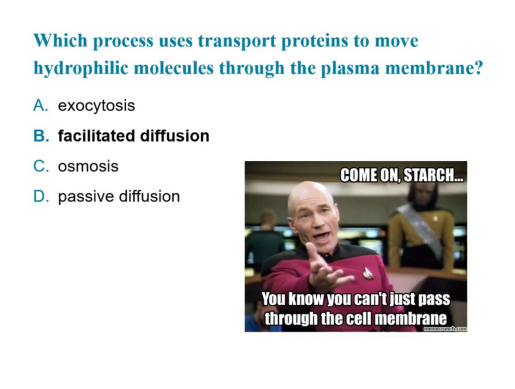

In [8]:
test_image_path = os.path.join(base_dir, 'data', 'raw', 'biology_chapter_3_3', 'extracted_keyframes',
                               'biology_chapter_3_3-Scene-097-01.jpg')

test_text_description = extract_text_from_image(test_image_path)
# Search for similar images in database
clip_model.search_similar_images(test_text_description)

# Test 2: Search for for a slightly different Text. 

2024-06-14 09:35:22.034 | INFO     | src.clip.clip_model:search_similar_images:145 - Query text embedding shape: torch.Size([1, 512])
2024-06-14 09:35:22.034 | INFO     | src.clip.clip_model:search_similar_images:146 - Text embeddings shape: torch.Size([3, 512])
2024-06-14 09:35:22.050 | INFO     | src.clip.clip_model:search_similar_images:150 - Similarity scores: tensor([0.6987, 0.8039, 0.6544], grad_fn=<SumBackward1>)
2024-06-14 09:35:22.050 | INFO     | src.clip.clip_model:search_similar_images:156 - Max similarity score: 0.803909182548523 at index: 1


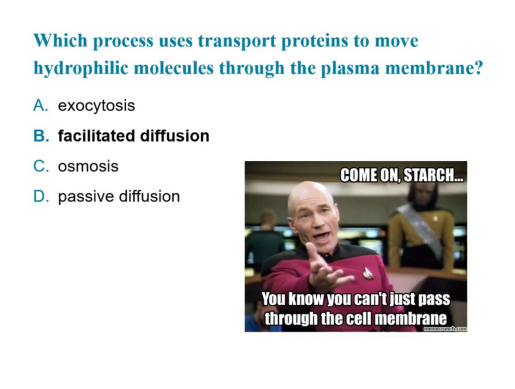

In [9]:
query_text = "plasma membrane and stuff going on"

clip_model.search_similar_images(query_text)